In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "airport_1.csv"
df = pd.read_csv(file, index_col = 0)
df = df[~df.isna()]
df.describe()
# 66554 159278

,DAY_OF_WEEK,DEP_DEL15,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Westchester County,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_Williston Basin International,PREVIOUS_AIRPORT_Wilmington International,PREVIOUS_AIRPORT_Yampa Valley,ARR_DEL,ARR_DEL15
count,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,...,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000,159278.000000
mean,3.885439,0.152061,3.550095,1.484449,3.298346,0.020781,3.319567,31.225907,121.730948,68872.290655,...,0.000358,0.008181,0.000006,0.006084,0.004433,0.000973,0.000006,0.000477,3.405128,0.106744
std,1.988185,0.359081,29.025401,26.090508,18.616080,2.841336,20.425510,11.541499,52.739152,24542.886040,...,0.018914,0.090077,0.002506,0.077761,0.066430,0.031180,0.002506,0.021839,10.324169,0.308789
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,8643.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,76.000000,66502.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,120.000000,73508.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,173.000000,84142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,1.000000,1780.000000,1196.000000,1195.000000,1047.000000,1456.000000,62.000000,293.000000,117728.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,1.000000


In [4]:
features_cls = list(df.columns)
features_cls.remove("ARR_DEL15")
features_cls.remove("ARR_DEL")
features_cls.remove("CARRIER_DELAY")
features_cls.remove("WEATHER_DELAY")
features_cls.remove("NAS_DELAY")
features_cls.remove("SECURITY_DELAY")
features_cls.remove("LATE_AIRCRAFT_DELAY")
col_target_cls = "ARR_DEL15"

## Classification

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[features_cls], df["ARR_DEL15"], test_size=0.33, stratify=df["ARR_DEL15"], random_state=42) # for classification

In [12]:
# min_features_to_select = 50  # Minimum number of features to consider
# clf = LogisticRegression()
# cv = StratifiedKFold(2)

# rfecv = RFECV(
#     estimator=clf,
#     step=1,
#     cv=cv,
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
#     n_jobs=2,
# )
# rfecv.fit(X_train, y_train)

# print(f"Optimal number of features: {rfecv.n_features_}")

In [13]:
# print("Best features : ", X_train.columns[rfecv.support_])

In [14]:
# best_features_cls = list(X_train.columns[rfecv.support_])
best_features_cls = ['DAY_OF_WEEK', 'DEP_DEL15', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS','AIRLINE_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRLINE', 'PLANE_AGE',
       'PRCP', 'TMAX', 'AWND', 'MONTH_1', 'MONTH_3', 'MONTH_4', 'MONTH_5',       'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11','MONTH_12',
        'DEP_TIME_BLK_0800-0859', 'DEP_TIME_BLK_0900-0959','DEP_TIME_BLK_1000-1059', 'DEP_TIME_BLK_1100-1159',
       'DEP_TIME_BLK_1200-1259', 'DEP_TIME_BLK_1300-1359','DEP_TIME_BLK_1400-1459', 'DEP_TIME_BLK_1500-1559',
       'DEP_TIME_BLK_1700-1759', 'DEP_TIME_BLK_2000-2059', 'DISTANCE_GROUP_1',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4','DISTANCE_GROUP_5', 'SEGMENT_NUMBER_1', 'SEGMENT_NUMBER_2',
       'SEGMENT_NUMBER_3', 'SEGMENT_NUMBER_4', 'SEGMENT_NUMBER_6','CARRIER_NAME_Delta Air Lines Inc.', 'CARRIER_NAME_Endeavor Air Inc.',
       'CARRIER_NAME_Midwest Airline, Inc.','CARRIER_NAME_SkyWest Airlines Inc.', 'CARRIER_NAME_Spirit Air Lines',
       'LATITUDE_44.886', 'LONGITUDE_-93.218','PREVIOUS_AIRPORT_Houston Intercontinental', 'PREVIOUS_AIRPORT_NONE']

Best Parameters: {'max_depth': 3, 'n_estimators': 100}
Best Score: 0.4892081786593344
F1-score : 0.6806816733342013
AUC : 0.7512550283304988


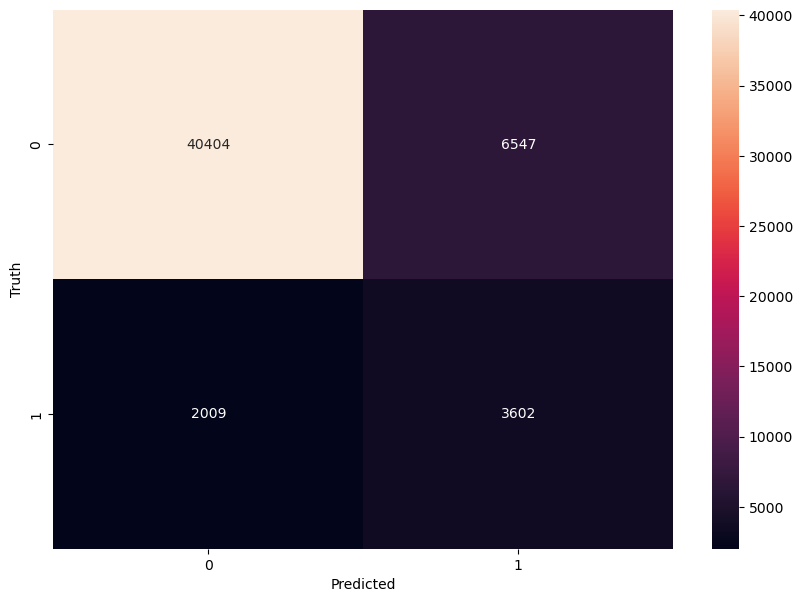

In [15]:
parameters = {'n_estimators': [100, 200], 'max_depth':[2, 3], }
model = RandomForestClassifier()
clf = GridSearchCV(model, param_grid = parameters, scoring="f1")
clf.fit(X_train[best_features_cls], y_train, sample_weight = 8*y_train.to_numpy() + 1)

best_parameters = clf.best_params_
print("Best Parameters:", best_parameters)

best_result = clf.best_score_
print("Best Score:", best_result)

best_model = clf.best_estimator_
y_pred = best_model.predict(X_test[best_features_cls])
cm = confusion_matrix(y_test, y_pred)

print("F1-score :", f1_score(y_test, y_pred, average='macro'))
print("AUC :", roc_auc_score(y_test, y_pred, average='macro'))

# Plotting using seaborn

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.48753719101042636
F1-score : 0.6876028119279076
AUC : 0.7838031585244848


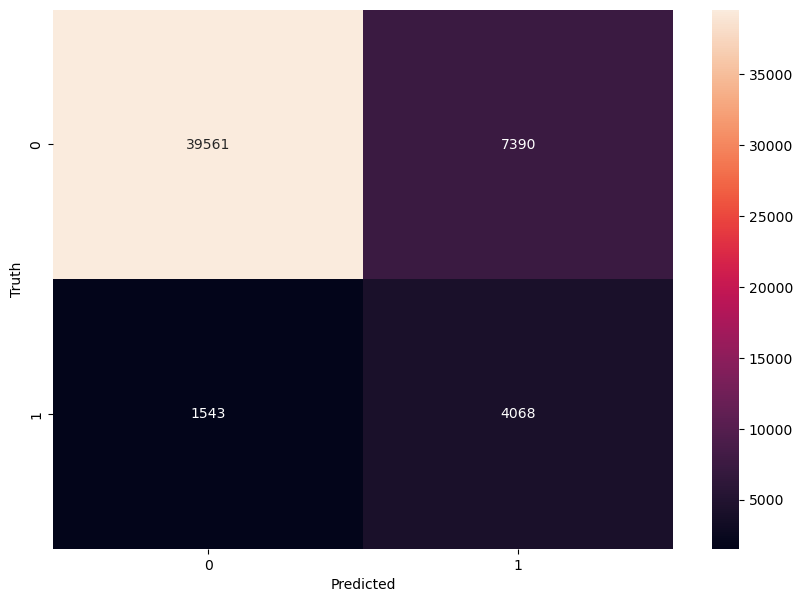

In [16]:
parameters = {
    'criterion': ['gini'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, param_grid = parameters, scoring="f1")
clf.fit(X_train, y_train, sample_weight = 8*y_train.to_numpy() + 1)

best_parameters = clf.best_params_
print("Best Parameters:", best_parameters)

best_result = clf.best_score_
print("Best Score:", best_result)

best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("F1-score :", f1_score(y_test, y_pred, average='macro'))
print("AUC :", roc_auc_score(y_test, y_pred, average='macro'))

# Plotting using seaborn

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()